In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
df = data.copy()

- There are no nan and null values but there are 0's in the data set. from simple logic except preganancie column all other column cannot have 0. so i am goin to interpolate these column using each columns mean.

In [4]:
(df == 0 ).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)  # Replace 0 with NaN
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)  # Replace 0 with NaN
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)  # Replace 0 with NaN
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'] = df['Insulin'].replace(0, np.nan)  # Replace 0 with NaN
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'] = df['BMI'].replace(0, np.nan)  # Replace 0 with NaN
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
493,4,125.0,70.000000,18.00000,122.000000,28.900000,1.144,45,1
676,9,156.0,86.000000,29.15342,155.548223,24.800000,0.230,53,1
173,1,79.0,60.000000,42.00000,48.000000,43.500000,0.678,23,0
443,8,108.0,70.000000,29.15342,155.548223,30.500000,0.955,33,1
60,2,84.0,72.405184,29.15342,155.548223,32.457464,0.304,21,0


<Axes: >

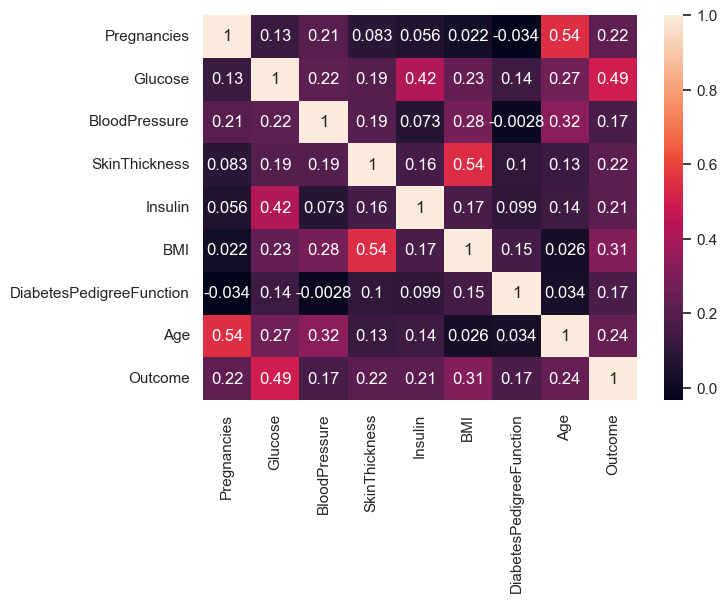

In [41]:
sns.heatmap(data=df.corr(),annot = True)

<Figure size 800x500 with 0 Axes>

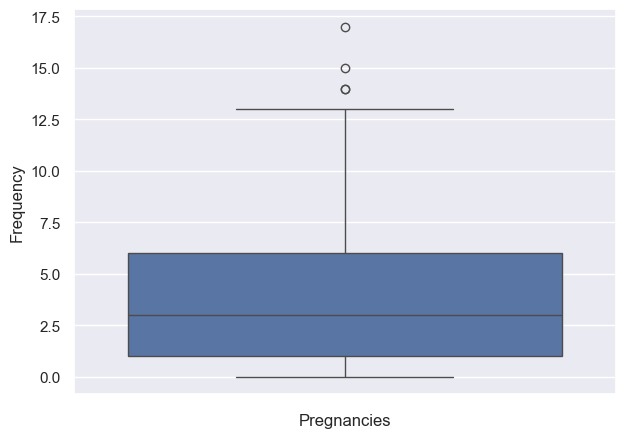

<Figure size 700x500 with 0 Axes>

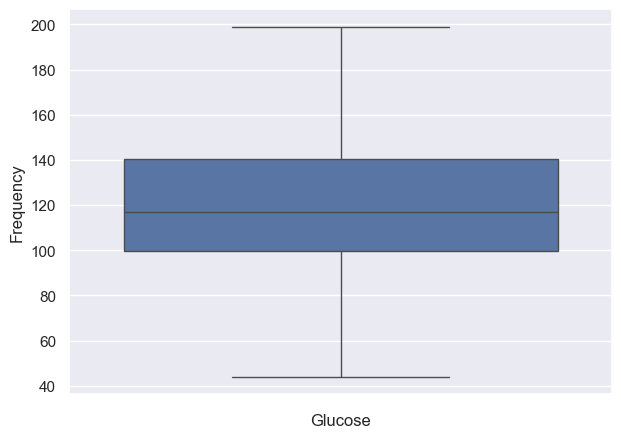

<Figure size 700x500 with 0 Axes>

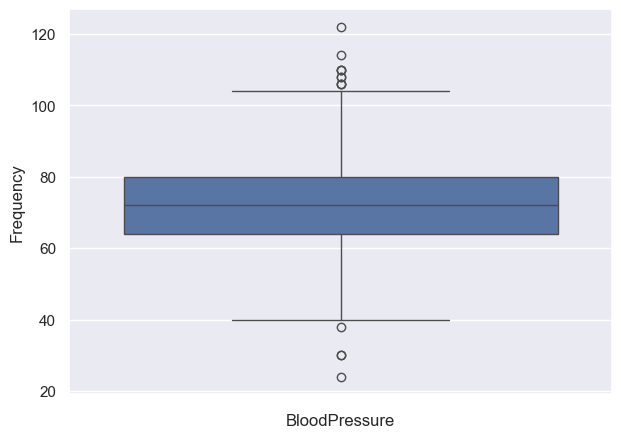

<Figure size 700x500 with 0 Axes>

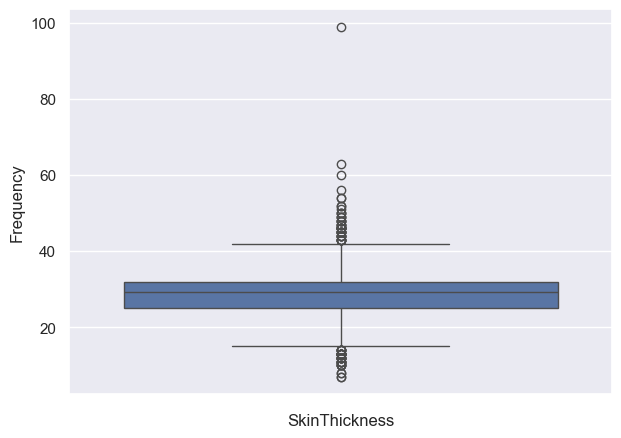

<Figure size 700x500 with 0 Axes>

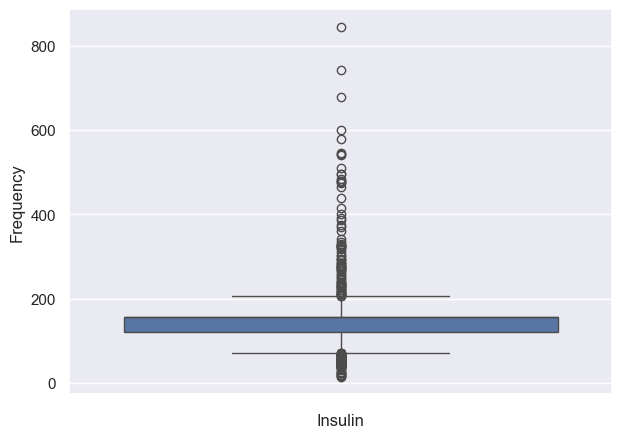

<Figure size 700x500 with 0 Axes>

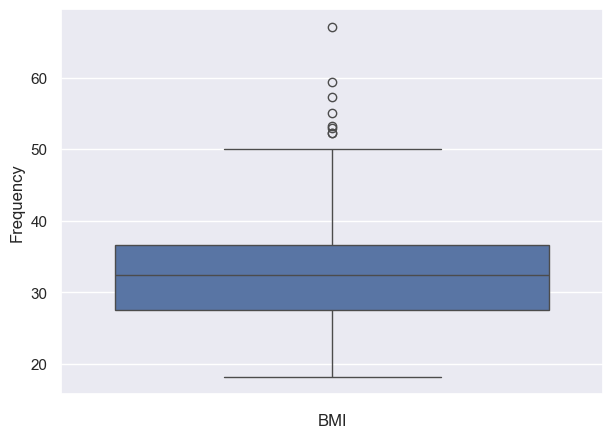

<Figure size 700x500 with 0 Axes>

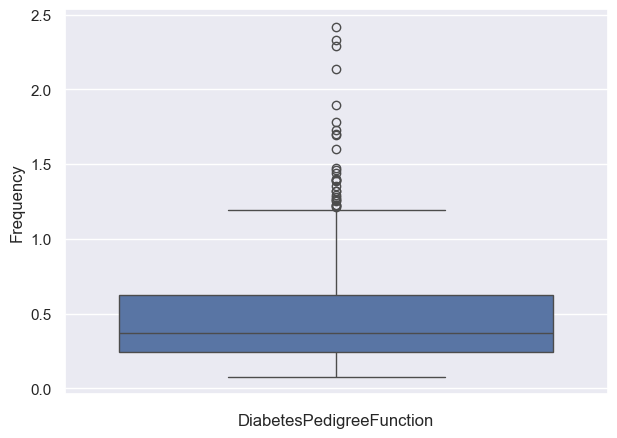

<Figure size 700x500 with 0 Axes>

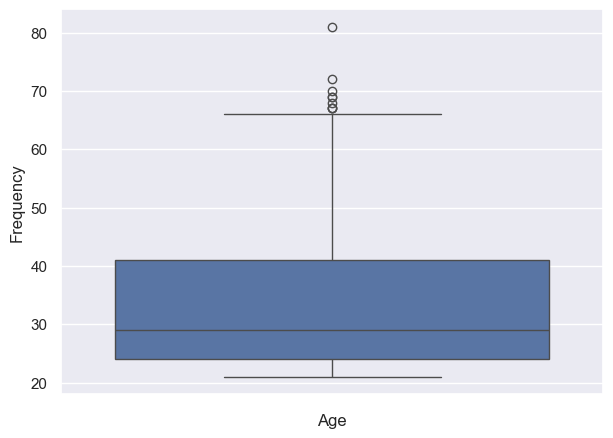

<Figure size 700x500 with 0 Axes>

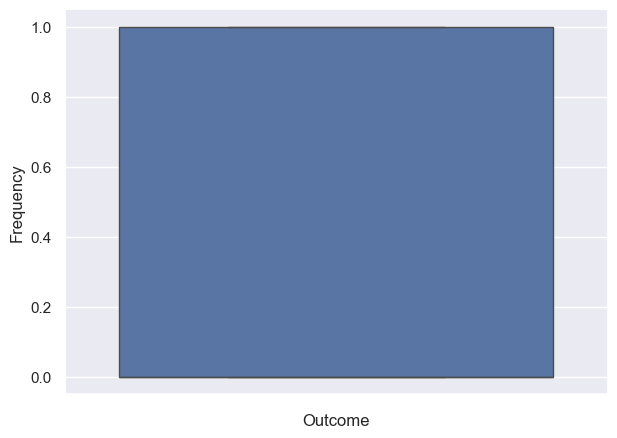

In [12]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(7, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
 

<Figure size 700x500 with 0 Axes>

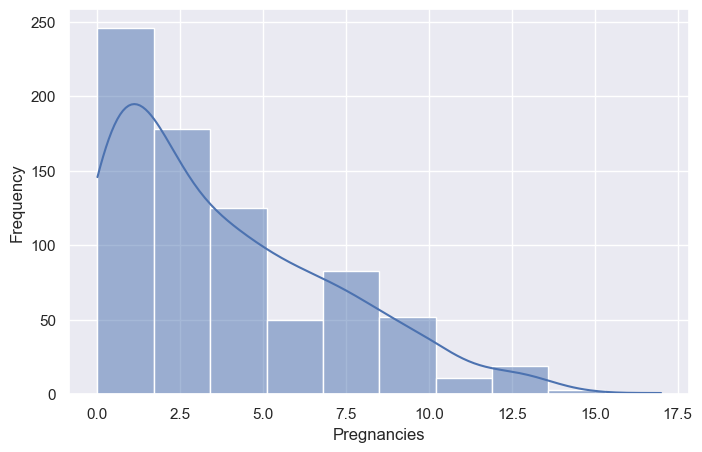

<Figure size 800x500 with 0 Axes>

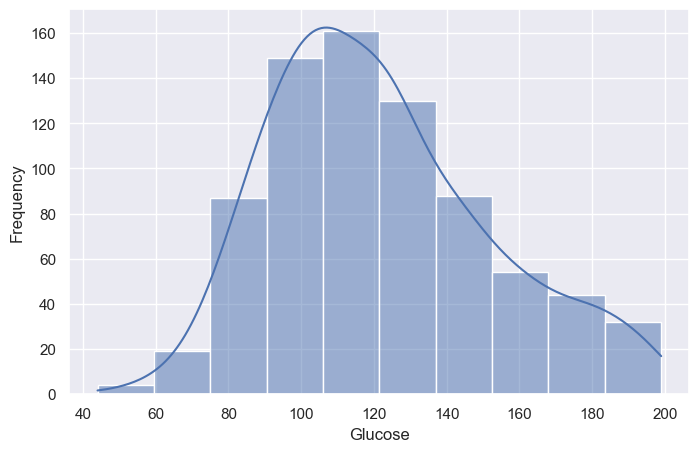

<Figure size 800x500 with 0 Axes>

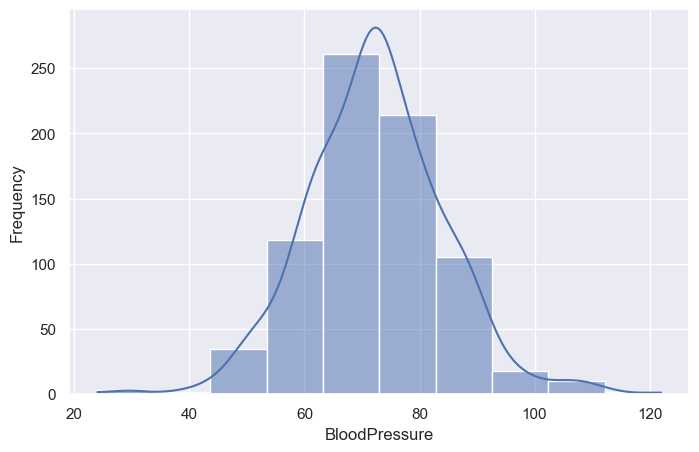

<Figure size 800x500 with 0 Axes>

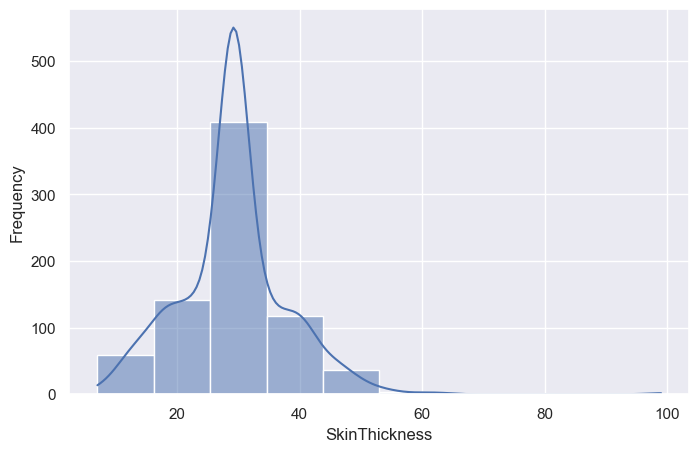

<Figure size 800x500 with 0 Axes>

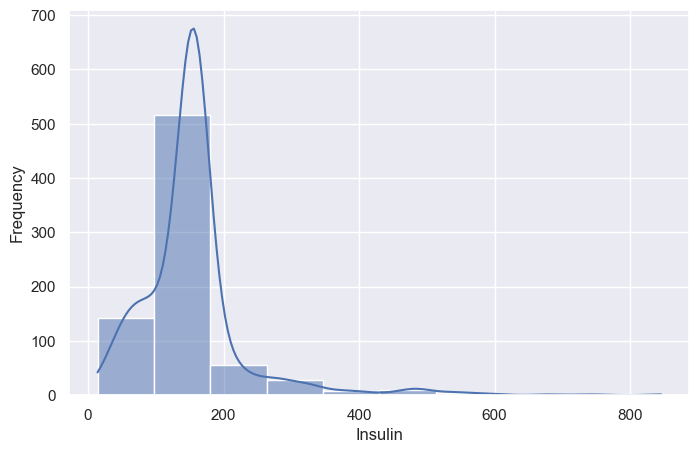

<Figure size 800x500 with 0 Axes>

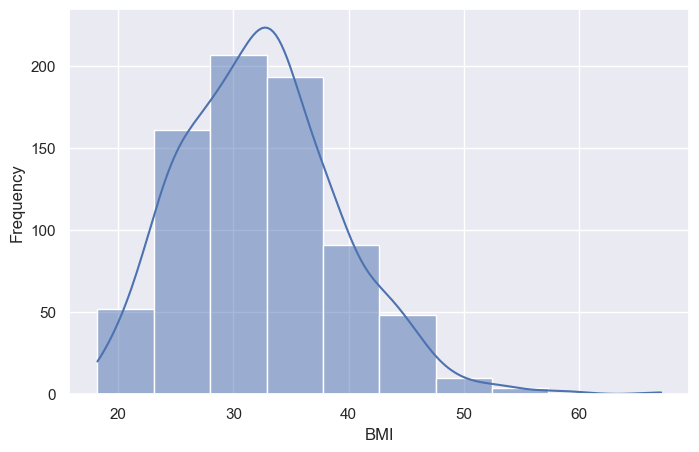

<Figure size 800x500 with 0 Axes>

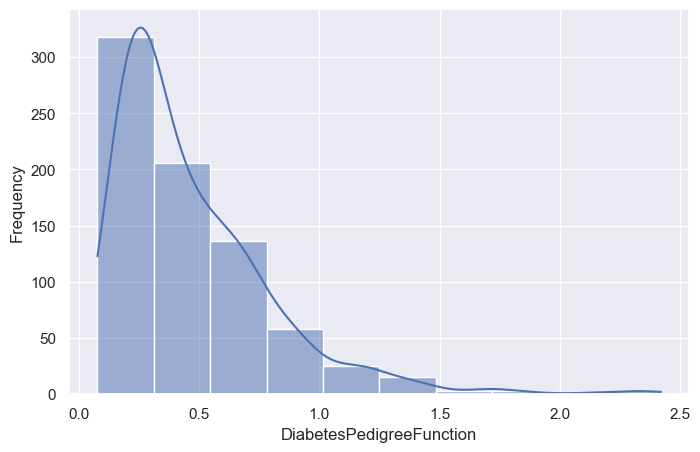

<Figure size 800x500 with 0 Axes>

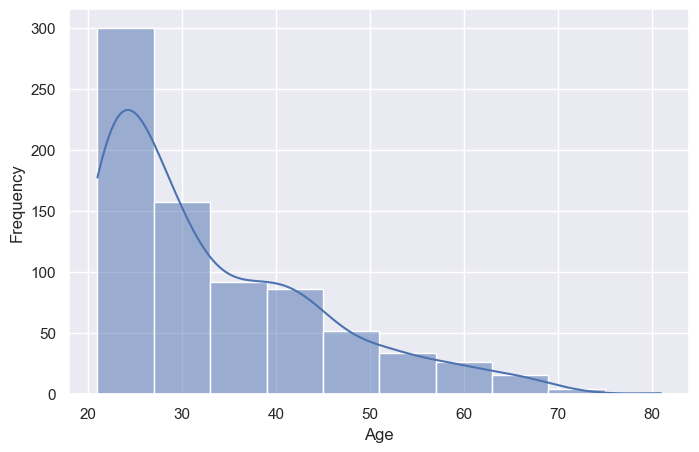

<Figure size 800x500 with 0 Axes>

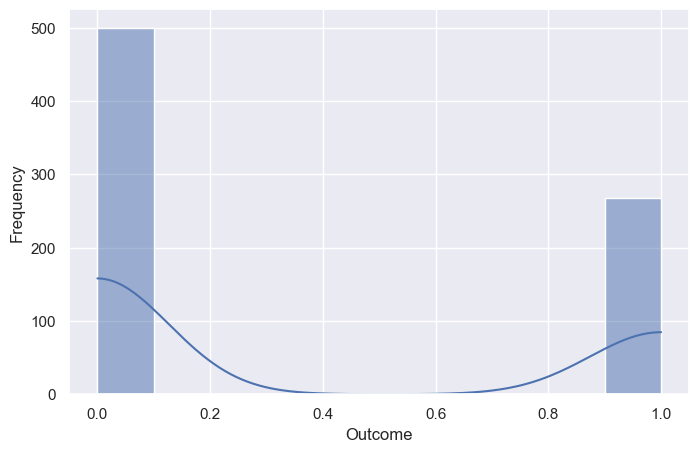

In [13]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, ( ax_hist) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)


Now going to remove all outliers from the data set.

In [37]:
df2 = df.copy()

In [39]:
z_score1 = np.abs((df2['Pregnancies'] - df2['Pregnancies'].mean()) / df2['Pregnancies'].std())
z_score2 = np.abs((df2['BloodPressure'] - df2['BloodPressure'].mean()) / df2['BloodPressure'].std())
z_score3 = np.abs((df2['SkinThickness'] - df2['SkinThickness'].mean()) / df2['SkinThickness'].std())
z_score4 = np.abs((df2['Insulin'] - df2['Insulin'].mean()) / df2['Insulin'].std())
z_score5 = np.abs((df2['BMI'] - df2['BMI'].mean()) / df2['BMI'].std())
z_score6 = np.abs((df2['DiabetesPedigreeFunction'] - df2['DiabetesPedigreeFunction'].mean()) / df2['DiabetesPedigreeFunction'].std())
z_score7 = np.abs((df2['Age'] - df2['Age'].mean()) / df2['Age'].std())

# Set a threshold for outlier detection (e.g., z-score > 3)
threshold = 7

# Identify outliers in specific columns
df2 = df2[z_score1 >= threshold]
df2 = df2[z_score2 >= threshold]
df2 = df2[z_score3 >= threshold]
df2 = df2[z_score4 >= threshold]
df2 = df2[z_score5 >= threshold]
df2 = df2[z_score6 >= threshold]
df2 = df2[z_score7 >= threshold]


C:\Users\MICRO\AppData\Local\Temp\ipykernel_4736\1730513807.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[z_score2 >= threshold]
C:\Users\MICRO\AppData\Local\Temp\ipykernel_4736\1730513807.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[z_score3 >= threshold]
C:\Users\MICRO\AppData\Local\Temp\ipykernel_4736\1730513807.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[z_score4 >= threshold]
C:\Users\MICRO\AppData\Local\Temp\ipykernel_4736\1730513807.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[z_score5 >= threshold]
C:\Users\MICRO\AppData\Local\Temp\ipykernel_4736\1730513807.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[z_score6 >= threshold]
C:\Users\MICRO\AppData\Local\Temp\ipykernel_4736\1730513807.py:19: UserWarning: Boolean Series key will be rei

In [40]:
df2.shape

(0, 9)

<Figure size 700x500 with 0 Axes>

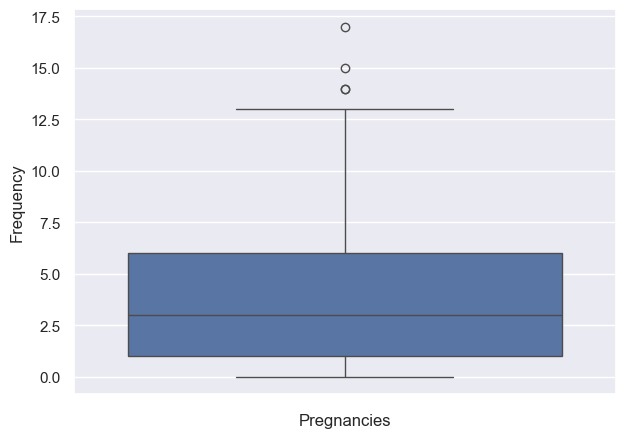

<Figure size 700x500 with 0 Axes>

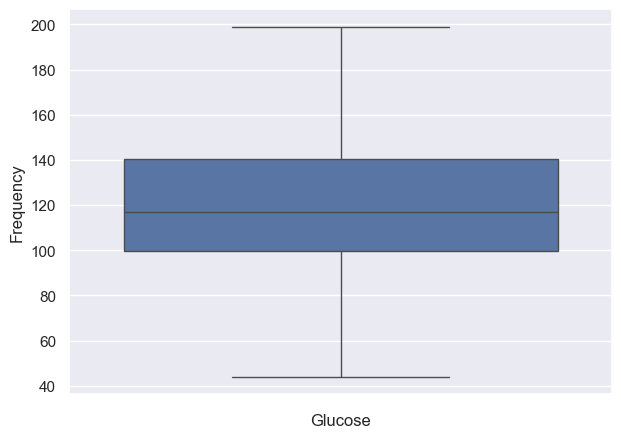

<Figure size 700x500 with 0 Axes>

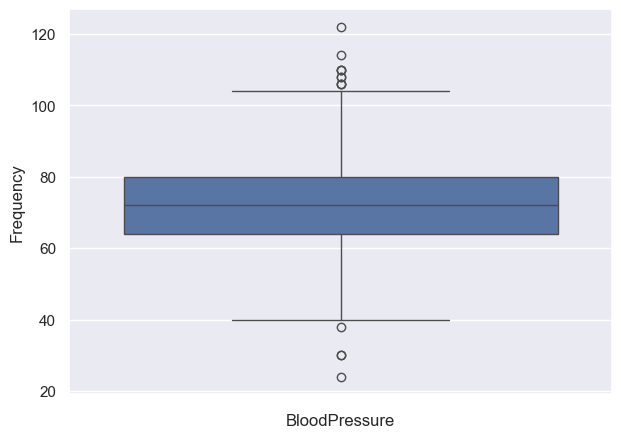

<Figure size 700x500 with 0 Axes>

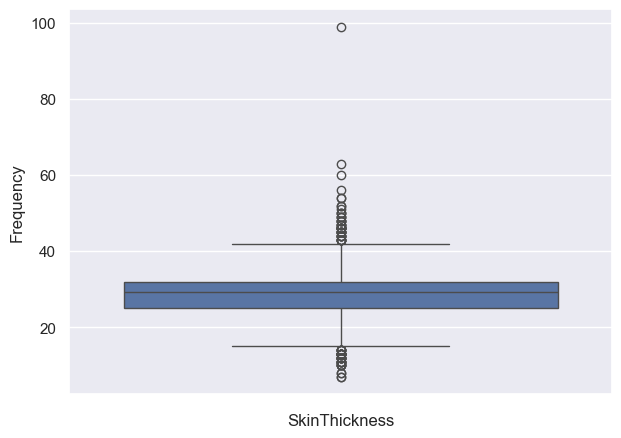

<Figure size 700x500 with 0 Axes>

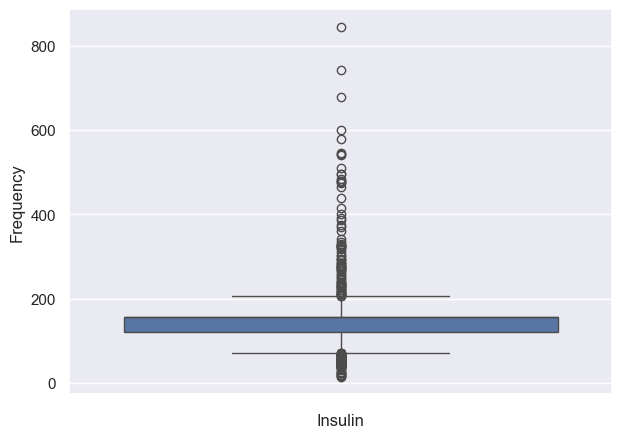

<Figure size 700x500 with 0 Axes>

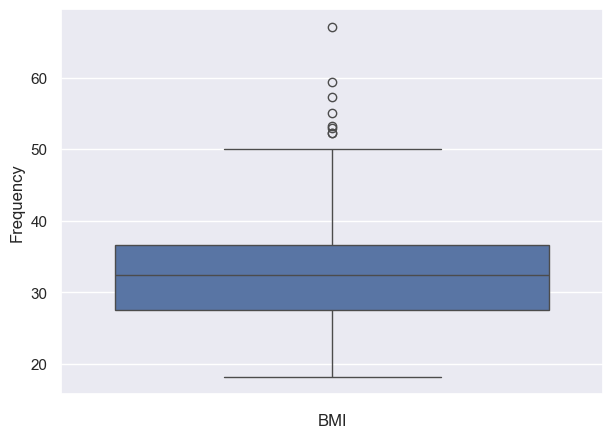

<Figure size 700x500 with 0 Axes>

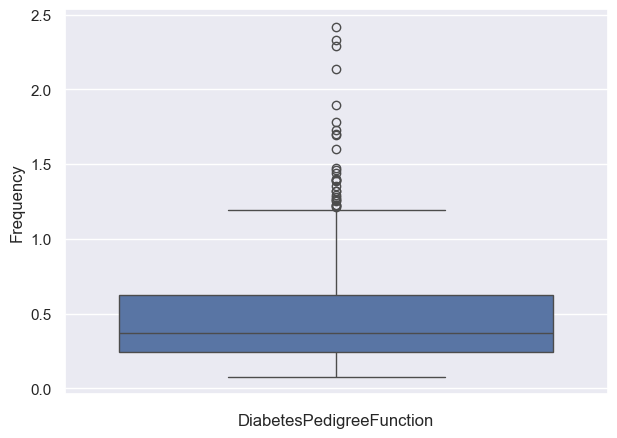

<Figure size 700x500 with 0 Axes>

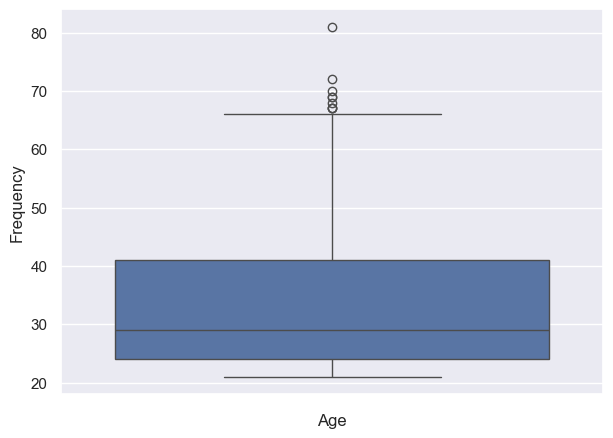

<Figure size 700x500 with 0 Axes>

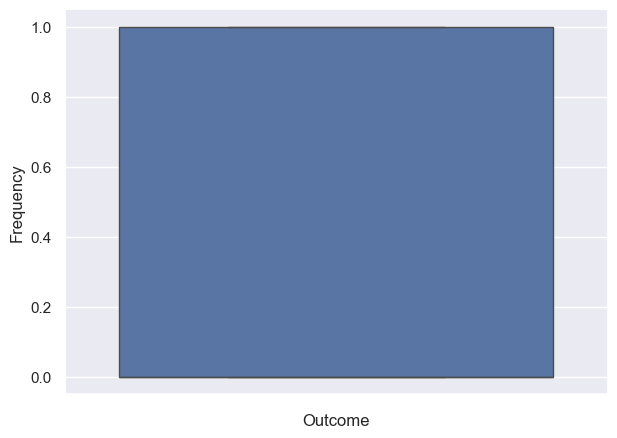

In [33]:
for i in df2.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(7, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)

In [20]:
df2.shape

(719, 9)